# Tutorial 1: Position and Orientation

We first import the required dependencies

In [1]:
# this line tells Jupyter that we are rendering plots in "notebook" style
%matplotlib notebook

# import libraries we need
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# here we define some auxiliary functions
def vector_to_homogeneous(vector):
    '''This method transforms 2D/3D vectors into homogeneous coordinates form'''
    return np.hstack([vector, 1])

## 1. Positions and Orientations in 2D

### 1.1 Translation in 2D

We define a 2D coordinate frame to represent our robot location in the the world frame (i.e., the grid)

Given a translation transformation defined as $\begin{vmatrix}0 & 0 & T_x\\0 & 0 & T_y\\0 & 0 & 1\end{vmatrix}$ where $T_x$ and $T_y$ correspond to the translation of the robot location along the $x$ and $y$ axis in the world frame, below we show how the new location of the robot (in the world frame) changes as the robot moves along the $x$ and/or $y$ axis directions.

<IPython.core.display.Javascript object>


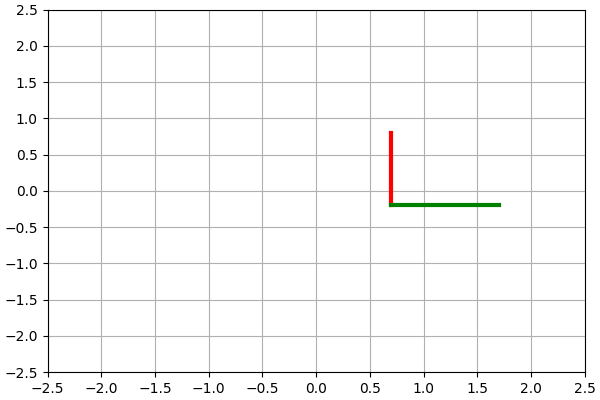

In [3]:
# Initial coordinates of robot's frame in the world coordinate frame
origin = np.array([0, 0])
x_axis = np.array([0, 1])
y_axis = np.array([1, 0])
 
# Here we plot the robot's frame
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
fig.canvas.toolbar_position = 'bottom'
x_arrow, = ax.plot([origin[0], x_axis[0]], [origin[1], x_axis[1]], color='r', lw=3)
y_arrow, = ax.plot([origin[0], y_axis[0]], [origin[1], y_axis[1]], color='g', lw=3)

ax.grid(True)   
_ = ax.set_xticks(np.arange(-2.5, 3, 0.5))
_ = ax.set_yticks(np.arange(-2.5, 3, 0.5))

# Interactive widgets used to translate the robot's frame
y_slider = widgets.FloatSlider(value=0, min=-2.5, max=2.5, step=.1, description='Trans. in Y',
                               continuous_update=False)
x_slider = widgets.FloatSlider(value=0, min=-2.5, max=2.5, step=.1, description='Trans. in X',
                               continuous_update=False)
bt_reset = widgets.Button(description="Reset frame")

def update_figure(trans_matrix):
    """
    Apply and display translation (trans_matrix argument) to robot's position and attached frame
    
    trans_matrix (array): transformation matrix
    """
    curr_y = np.array(y_arrow.get_data())
    curr_x = np.array(x_arrow.get_data())    
    new_o = trans_matrix.dot(vector_to_homogeneous(curr_y[:,0]))
    new_x = trans_matrix.dot(vector_to_homogeneous(curr_x[:,1]))
    new_y = trans_matrix.dot(vector_to_homogeneous(curr_y[:,1]))
    y_arrow.set_data([new_o[0], new_x[0]], [new_o[1], new_x[1]])
    x_arrow.set_data([new_o[0], new_y[0]], [new_o[1], new_y[1]])
    fig.canvas.draw()
        

def translate_y(change):
    """
    Define a translation transformation based on y values coming from the sliders.
    The translation is then applied to robot's position and attached frame
    
    change (float): displacement in y direction
    """
    trans_matrix = np.eye(3)
    trans_matrix[1,-1] = (change.new - change.old)
    update_figure(trans_matrix)
        
def translate_x(change):
    """
    Define a translation transformation based on y values coming from the sliders.
    The translation is then applied to robot's position and attached frame
    
    change (float): displacement in y direction
    """
    trans_matrix = np.eye(3)
    trans_matrix[0,-1] = (change.new - change.old)
    update_figure(trans_matrix)
    
def on_reset_clicked(b=None):
    """
    Resets sliders and figure to zero values and location
    """
    y_slider.value = 0
    x_slider.value = 0
    y_arrow.set_data([origin[0], x_axis[0]], [origin[1], x_axis[1]])
    x_arrow.set_data([origin[0], y_axis[0]], [origin[1], y_axis[1]])
    fig.canvas.draw()

controls = widgets.HBox([x_slider, y_slider, bt_reset])
display(controls)
y_slider.observe(translate_y, 'value')
x_slider.observe(translate_x, 'value')
bt_reset.on_click(on_reset_clicked)

Move the sliders to translate the robot's frame in the $x$ or $y$ direction

### 1.2 Rotations in 2D

Given a rotation transformation defined as $\begin{vmatrix}cos\theta & -sin\theta & 0\\sin\theta & cos\theta & 0\\0 & 0 & 1\end{vmatrix}$ where $\theta$ corresponds to the rotation angle around the world's frame origin $(0, 0)$, below we show how the new location of the robot (in the world frame) changes as the angle $\theta$ increases or decreases.

<IPython.core.display.Javascript object>


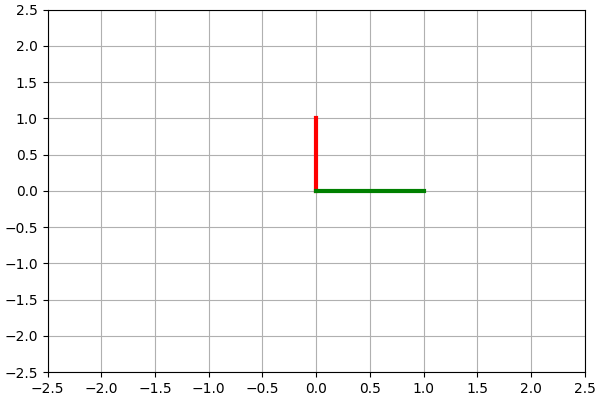

In [5]:
# Here we plot the robot's frame
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
fig.canvas.toolbar_position = 'bottom'
x_arrow, = ax.plot([origin[0], x_axis[0]], [origin[1], x_axis[1]], color='r', lw=3)
y_arrow, = ax.plot([origin[0], y_axis[0]], [origin[1], y_axis[1]], color='g', lw=3)

ax.grid(True)   
_ = ax.set_xticks(np.arange(-2.5, 3, 0.5))
_ = ax.set_yticks(np.arange(-2.5, 3, 0.5))

# Interactive widgets used to rotate the robot's frame around the origin
theta_slider = widgets.FloatSlider(value=0, min=0, max=2, step=.1, description=r'$\theta$ (rad)',
                               continuous_update=True)
bt_reset = widgets.Button(description="Reset frame")

def update_figure(trans_matrix):
    """
    Apply and displays rotation (trans_matrix argument) to robot's position and attached frame
    
    trans_matrix (array): transformation matrix
    """
    curr_y = np.array(y_arrow.get_data())
    curr_x = np.array(x_arrow.get_data())    
    new_o = trans_matrix.dot(vector_to_homogeneous(curr_y[:,0]))
    new_x = trans_matrix.dot(vector_to_homogeneous(curr_x[:,1]))
    new_y = trans_matrix.dot(vector_to_homogeneous(curr_y[:,1]))
    y_arrow.set_data([new_o[0], new_x[0]], [new_o[1], new_x[1]])
    x_arrow.set_data([new_o[0], new_y[0]], [new_o[1], new_y[1]])
    fig.canvas.draw()
    
def rotate(change):
    r_theta = (change.new - change.old)*np.pi
    cos_theta = np.cos(r_theta)
    sin_theta = np.sin(r_theta)
        
    l_tr_w = np.array([[cos_theta, sin_theta, 0],
                       [-sin_theta, cos_theta, 0],
                       [0,0,1]])
    update_figure(l_tr_w)
            
def on_rot_reset_clicked(b):
    """
    Resets sliders and figure to zero values and location
    """
    theta_slider.value = 0
    y_arrow.set_data([origin[0], x_axis[0]], [origin[1], x_axis[1]])
    x_arrow.set_data([origin[0], y_axis[0]], [origin[1], y_axis[1]])
    fig.canvas.draw()

controls = widgets.HBox([theta_slider, bt_reset])
display(controls)
theta_slider.observe(rotate, 'value')
bt_reset.on_click(on_rot_reset_clicked)

Move the slider to rotate the robot's frame around the origin by $\theta$ radians

### 1.3 Homogeneous Transformation in 2D (Exercise)

Complete the code below to combine translation and rotation into a single transformation

<IPython.core.display.Javascript object>


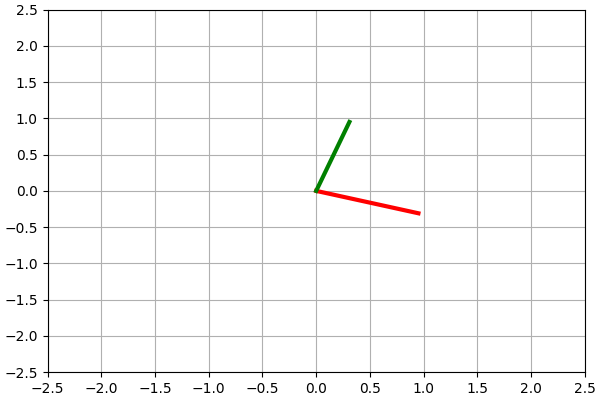

In [6]:
# Here we plot the robot's frame
fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
fig.canvas.toolbar_position = 'bottom'
x_arrow, = ax.plot([origin[0], x_axis[0]], [origin[1], x_axis[1]], color='r', lw=3)
y_arrow, = ax.plot([origin[0], y_axis[0]], [origin[1], y_axis[1]], color='g', lw=3)

ax.grid(True)   
_ = ax.set_xticks(np.arange(-2.5, 3, 0.5))
_ = ax.set_yticks(np.arange(-2.5, 3, 0.5))

# Interactive widgets used to translate the robot's frame
y_slider = widgets.FloatSlider(value=0, min=-2.5, max=2.5, step=.1, description='Trans. in Y',
                               continuous_update=False)
x_slider = widgets.FloatSlider(value=0, min=-2.5, max=2.5, step=.1, description='Trans. in X',
                               continuous_update=False)
theta_slider = widgets.FloatSlider(value=0, min=0, max=2, step=.1, description=r'$\theta$ (rad)',
                               continuous_update=True)
bt_transform = widgets.Button(description="Apply transformation")
bt_reset = widgets.Button(description="Reset frame")

def update_figure(trans_matrix):
    new_o = trans_matrix.dot(vector_to_homogeneous(origin))
    new_x = trans_matrix.dot(vector_to_homogeneous(x_axis))
    new_y = trans_matrix.dot(vector_to_homogeneous(y_axis))
    y_arrow.set_data([new_o[0], new_x[0]], [new_o[1], new_x[1]])
    x_arrow.set_data([new_o[0], new_y[0]], [new_o[1], new_y[1]])
    fig.canvas.draw()

    
def on_transform(b):
    x = x_slider.value
    y = y_slider.value
    theta = theta_slider.value*np.pi
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    my_transform = np.eye(3)
    # TODO: Complete transformation matrix 
#     my_transform = np.array([[?, ?, ?],
#                              [?, ?, ?],
#                              [0,0,1]])
    
    # Solution
    my_transform = np.array([[cos_theta, sin_theta, x],
                             [-sin_theta, cos_theta, y],
                             [0,0,1]])
    
    update_figure(my_transform)
    
    
def on_reset(b):
    y_slider.value = 0
    x_slider.value = 0
    theta_slider.value = 0
    y_arrow.set_data([origin[0], x_axis[0]], [origin[1], x_axis[1]])
    x_arrow.set_data([origin[0], y_axis[0]], [origin[1], y_axis[1]])
    fig.canvas.draw()

sliders = widgets.VBox([x_slider, y_slider, theta_slider])    
buttons = widgets.VBox([bt_transform, bt_reset])
controls = widgets.HBox([sliders, buttons])
display(controls)
bt_reset.on_click(on_reset)
bt_transform.on_click(on_transform)

## 2. Position and Rotations in 3D

Lets now extend the definition of translations and rotations to a 3-dimensional world.

Below we show the definition of translations and rotations along the $x$ axis. Please extend these definitions to the $y$ and $z$ axis. To do so, complete the following methods: ```translate_y(change), translate_z(change), rotate_y(change), rotate_z(change) ```

<IPython.core.display.Javascript object>


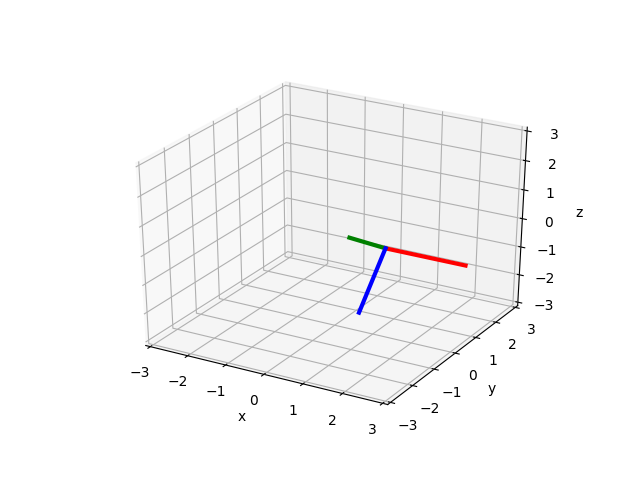

In [7]:
origin = np.array([0, 0, 0])
x_axis = np.array([2, 0, 0])
y_axis = np.array([0, 2, 0])
z_axis = np.array([0, 0, 2])
 
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3,3),ax.set_ylim(-3,3),ax.set_zlim(-3,3)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')
fig.canvas.toolbar_position = 'bottom'
x_arrow, = ax.plot([origin[0], x_axis[0]], [origin[1], x_axis[1]], [origin[2], x_axis[2]],
                   color='r', lw=3)
y_arrow, = ax.plot([origin[0], y_axis[0]], [origin[1], y_axis[1]], [origin[2], y_axis[2]],
                   color='g', lw=3)
z_arrow, = ax.plot([origin[0], z_axis[0]], [origin[1], z_axis[1]], [origin[2], z_axis[2]],
                   color='b', lw=3)
theta_slider = widgets.FloatSlider(value=0, min=0, max=2, step=.1, description=r'$\theta$ (rad)',
                               continuous_update=True)


# Interactive widgets used to translate the robot's frame
txt_translation = widgets.Text(value="Translation", disabled=True)
txt_rotation = widgets.Text(value="Rotation", disabled=True)

x_slider = widgets.FloatSlider(value=0, min=-2.5, max=2.5, step=.1, description=r'$T_x$',
                               continuous_update=False)
y_slider = widgets.FloatSlider(value=0, min=-2.5, max=2.5, step=.1, description=r'$T_y$',
                               continuous_update=False)
z_slider = widgets.FloatSlider(value=0, min=-2.5, max=2.5, step=.1, description=r'$T_z$',
                               continuous_update=False)
rot_x_slider = widgets.FloatSlider(value=0, min=0, max=2, step=.1, description=r'$R_x$',
                               continuous_update=False)
rot_y_slider = widgets.FloatSlider(value=0, min=0, max=2, step=.1, description=r'$R_y$',
                               continuous_update=False)
rot_z_slider = widgets.FloatSlider(value=0, min=0, max=2, step=.1, description=r'$R_z$',
                               continuous_update=False)
bt_reset = widgets.Button(description="Reset frame")

def update_figure(trans_matrix):
    curr_y = np.array(y_arrow.get_data_3d())
    curr_x = np.array(x_arrow.get_data_3d())
    curr_z = np.array(z_arrow.get_data_3d())
    new_o = trans_matrix.dot(vector_to_homogeneous(curr_x[:,0]))
    new_x = trans_matrix.dot(vector_to_homogeneous(curr_x[:,1]))
    new_y = trans_matrix.dot(vector_to_homogeneous(curr_y[:,1]))
    new_z = trans_matrix.dot(vector_to_homogeneous(curr_z[:,1]))
    x_arrow.set_data_3d([new_o[0], new_x[0]], [new_o[1], new_x[1]], [new_o[2], new_x[2]])
    y_arrow.set_data_3d([new_o[0], new_y[0]], [new_o[1], new_y[1]], [new_o[1], new_y[2]])
    z_arrow.set_data_3d([new_o[0], new_z[0]], [new_o[1], new_z[1]], [new_o[1], new_z[2]])
    fig.canvas.draw()
    
def translate_x(change):
    amount = (change.new - change.old)
    transform = np.eye(4)
    transform[0,-1] = (change.new - change.old)
    update_figure(transform)
        
def translate_y(change):
    amount = (change.new - change.old)
    #TODO: Complete
    
def translate_z(change):
    amount = (change.new - change.old)
    #TODO: Complete
    
def rotate_x(change):
    theta = (change.new - change.old)*np.pi
    transform = np.array([[1,0,0,0],
                         [0, np.cos(theta), -np.sin(theta), 0],
                         [0, np.sin(theta), np.cos(theta), 0],
                         [0,0,0,1]])
    update_figure(transform)
    
def rotate_y(change):
    theta = (change.new - change.old)*np.pi
    #TODO: Complete
    
def rotate_z(change):
    theta = (change.new - change.old)*np.pi
    #TODO: Complete
    
def on_reset_clicked(b):
    y_slider.value = 0.0
    rot_y_slider.value = 0.0
    x_slider.value = 0.0
    rot_z_slider.value = 0.0
    z_slider.value = 0
    rot_z_slider.value = 0
    x_arrow.set_data_3d([origin[0], x_axis[0]], [origin[1], x_axis[1]], [origin[2], x_axis[2]])
    y_arrow.set_data_3d([origin[0], y_axis[0]], [origin[1], y_axis[1]], [origin[2], y_axis[2]])
    z_arrow.set_data_3d([origin[0], z_axis[0]], [origin[1], z_axis[1]], [origin[2], z_axis[2]])
    fig.canvas.draw()
                                                                      
trans_controls = widgets.VBox([txt_translation, x_slider, y_slider, z_slider])                                   
rot_controls = widgets.VBox([txt_rotation, rot_x_slider, rot_y_slider, rot_z_slider])  
controls = widgets.HBox([trans_controls, rot_controls, bt_reset])
display(controls)
x_slider.observe(translate_x, 'value')
y_slider.observe(translate_y, 'value')
z_slider.observe(translate_z, 'value')
rot_x_slider.observe(rotate_x, 'value')
rot_y_slider.observe(rotate_y, 'value')
rot_z_slider.observe(rotate_z, 'value')
bt_reset.on_click(on_reset_clicked)

In [11]:
#Pending: Coding exercise